In [5]:
df = pd.read_csv("Border_Crossing_Entry_Data.csv")
df.head()

,Port Name,State,Port Code,Border,Date,Measure,Value,Latitude,Longitude,Point
0,Roma,Texas,2310,US-Mexico Border,Dec 2023,Buses,46,26.404,-99.019,POINT (-99.018981 26.403928)
1,Del Rio,Texas,2302,US-Mexico Border,Dec 2023,Trucks,6552,29.327,-100.928,POINT (-100.927612 29.326784)
2,Roma,Texas,2310,US-Mexico Border,Nov 2023,Trucks,3753,26.404,-99.019,POINT (-99.018981 26.403928)
3,Douglas,Arizona,2601,US-Mexico Border,Oct 2023,Buses,13,31.334,-109.560,POINT (-109.560344 31.334043)
4,Beecher Falls,Vermont,206,US-Canada Border,Aug 2023,Trucks,422,45.013,-71.505,POINT (-71.505309 45.013411)


In [6]:
df.isnull().sum()

Port Name    0
State        0
Port Code    0
Border       0
Date         0
Measure      0
Value        0
Latitude     0
Longitude    0
Point        0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396401 entries, 0 to 396400
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Port Name  396401 non-null  object 
 1   State      396401 non-null  object 
 2   Port Code  396401 non-null  int64  
 3   Border     396401 non-null  object 
 4   Date       396401 non-null  object 
 5   Measure    396401 non-null  object 
 6   Value      396401 non-null  int64  
 7   Latitude   396401 non-null  float64
 8   Longitude  396401 non-null  float64
 9   Point      396401 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 30.2+ MB


In [8]:
df.describe()

,Port Code,Value,Latitude,Longitude
count,396401.000000,3.964010e+05,396401.000000,396401.000000
mean,2446.346710,2.887291e+04,43.972804,-99.727511
std,1204.196313,1.495752e+05,8.151960,18.259424
min,101.000000,0.000000e+00,25.952000,-141.001000
25%,2304.000000,0.000000e+00,42.999000,-114.728000
50%,3012.000000,1.440000e+02,48.122000,-101.628000
75%,3401.000000,2.993000e+03,49.000000,-89.585000
max,3814.000000,4.447374e+06,62.615000,-66.980000


In [11]:
print(df.drop_duplicates(inplace=True))

None


In [13]:
df[df['Value'] > 0]

,Port Name,State,Port Code,Border,Date,Measure,Value,Latitude,Longitude,Point
0,Roma,Texas,2310,US-Mexico Border,Dec 2023,Buses,46,26.404,-99.019,POINT (-99.018981 26.403928)
1,Del Rio,Texas,2302,US-Mexico Border,Dec 2023,Trucks,6552,29.327,-100.928,POINT (-100.927612 29.326784)
2,Roma,Texas,2310,US-Mexico Border,Nov 2023,Trucks,3753,26.404,-99.019,POINT (-99.018981 26.403928)
3,Douglas,Arizona,2601,US-Mexico Border,Oct 2023,Buses,13,31.334,-109.560,POINT (-109.560344 31.334043)
4,Beecher Falls,Vermont,206,US-Canada Border,Aug 2023,Trucks,422,45.013,-71.505,POINT (-71.505309 45.013411)
...,...,...,...,...,...,...,...,...,...,...
396396,Ogdensburg,New York,701,US-Canada Border,Oct 2024,Buses,7,44.733,-75.458,POINT (-75.4577501759 44.7330898624)
396397,Limestone,Maine,118,US-Canada Border,Oct 2024,Personal Vehicle Passengers,1588,46.925,-67.790,POINT (-67.789597 46.924555)
396398,Turner,Montana,3306,US-Canada Border,Oct 2024,Truck Containers Empty,34,49.000,-108.388,POINT (-108.387916 48.999527)
396399,El Paso,Texas,2402,US-Mexico Border,Oct 2024,Rail Containers Loaded,2109,31.764,-106.451,POINT (-106.451188 31.764363)


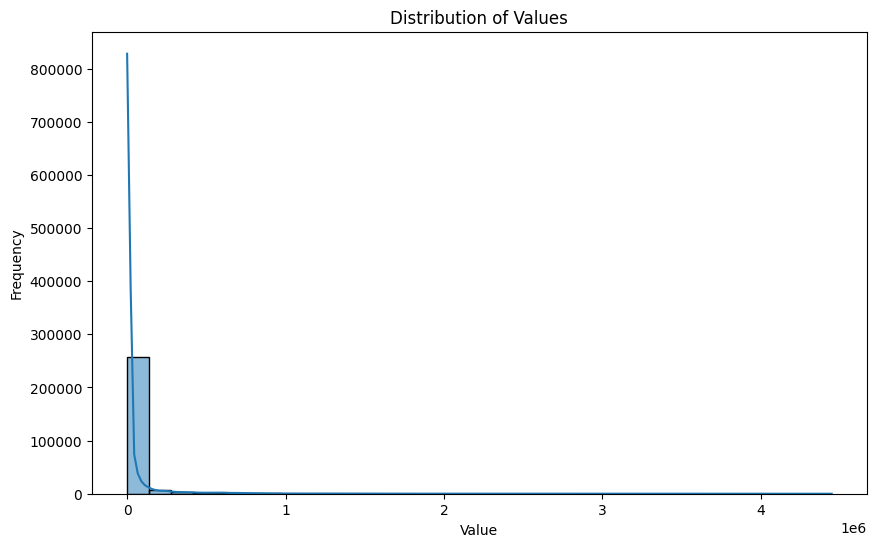

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Value'], bins=32, kde=True)
plt.title('Distribution of Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

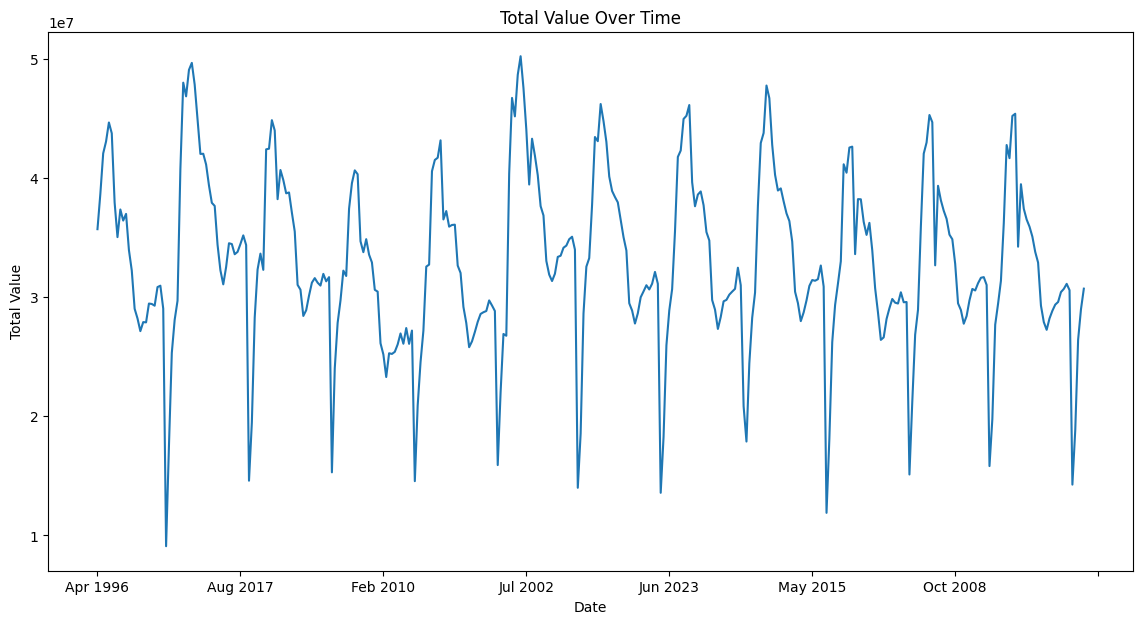

In [18]:
plt.figure(figsize=(14, 7))
df.groupby('Date')['Value'].sum().plot()
plt.title('Total Value Over Time')
plt.xlabel('Date')
plt.ylabel('Total Value')
plt.show()

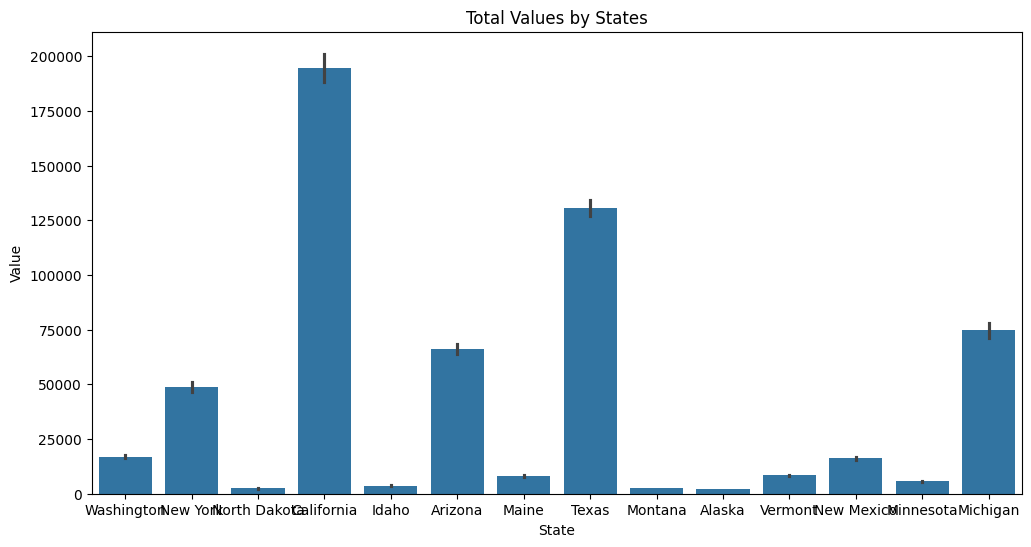

In [25]:
plt.figure(figsize=(12, 6))
sorted_df = df.sort_values('Value', ascending=True)
sns.barplot(x ='State', y='Value', data=sorted_df)
plt.title('Total Values by States')
plt.xlabel('State')
plt.ylabel('Value')
plt.show()                                                             

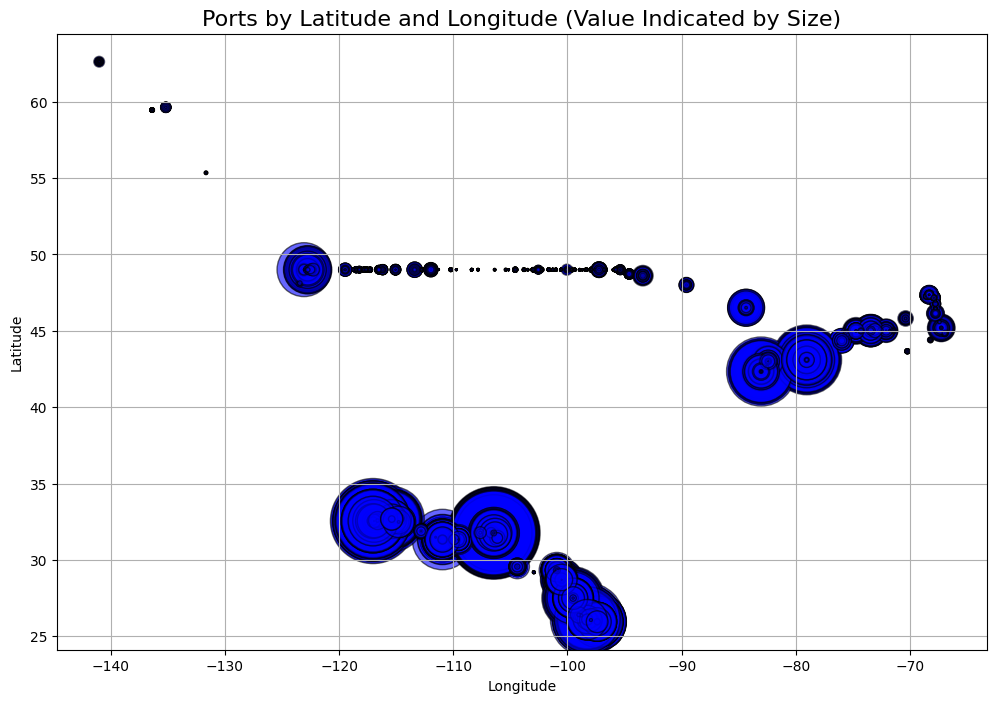

In [26]:
plt.figure(figsize=(12, 8))
plt.scatter(df['Longitude'], df['Latitude'], s=df['Value'] / 1000, alpha=0.6, c='blue', edgecolor='k')
plt.title('Ports by Latitude and Longitude (Value Indicated by Size)', fontsize=16)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()


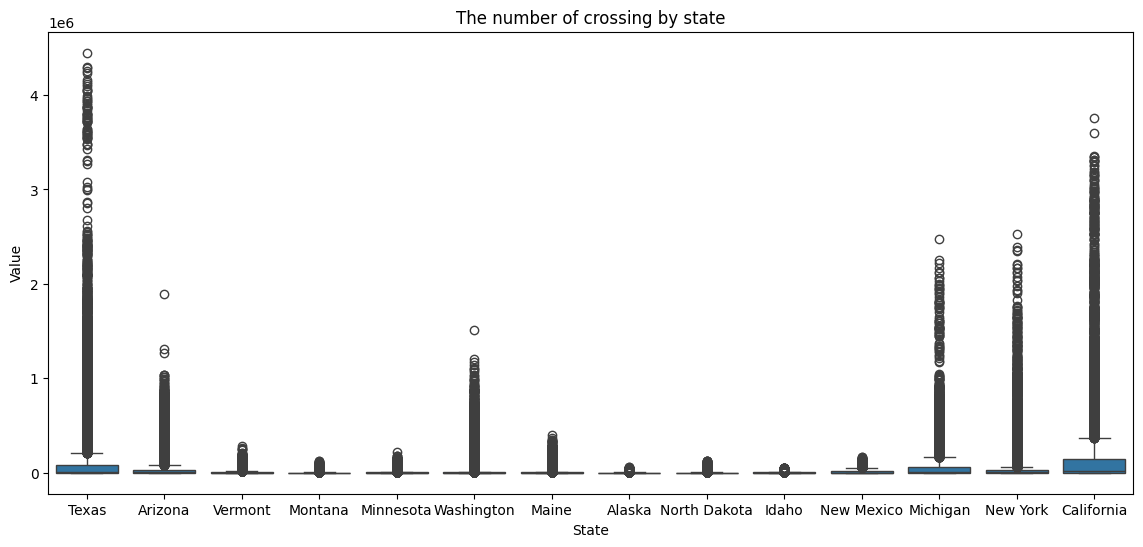

In [31]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='State', y='Value', data=df)
plt.title('The number of crossing by state')
plt.xlabel('State')
plt.ylabel('Value')
plt.show()

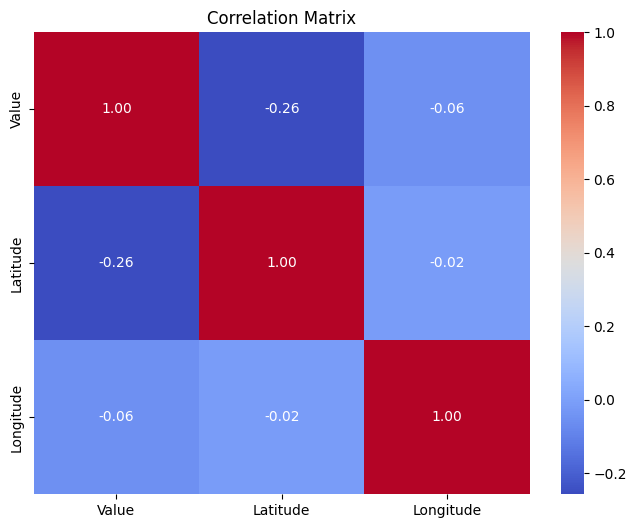

In [39]:
correlation = df[['Value', 'Latitude', 'Longitude']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


/var/folders/1n/6k_c10z17p16t66tb2m255pc0000gn/T/ipykernel_2139/1457142186.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_ports.values, y=top_ports.index, palette='viridis')


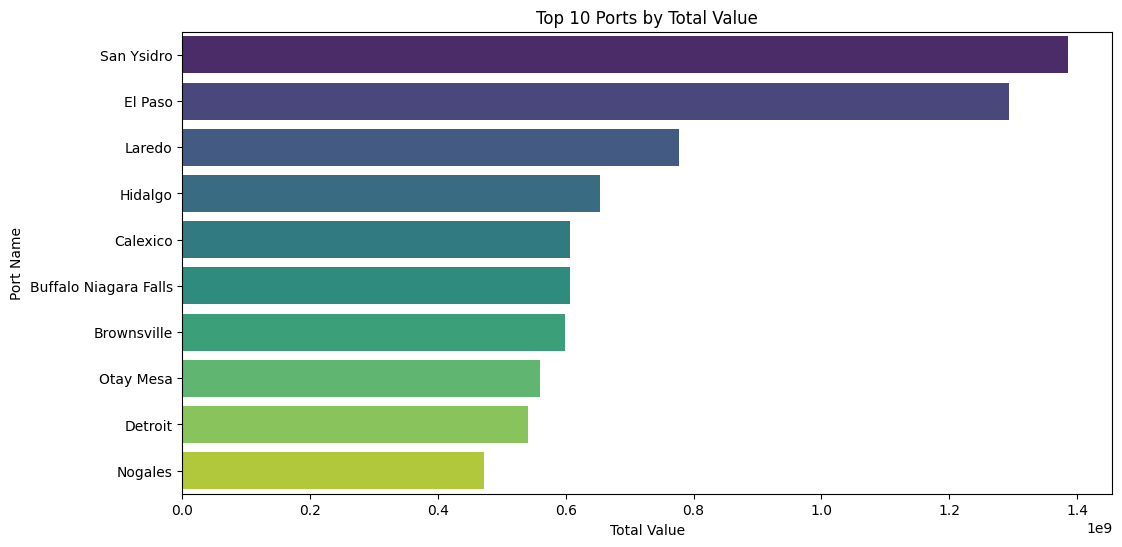

In [46]:
top_ports = df.groupby('Port Name')['Value'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_ports.values, y=top_ports.index, palette='viridis')
plt.title('Top 10 Ports by Total Value')
plt.xlabel('Total Value')
plt.ylabel('Port Name')
plt.show()


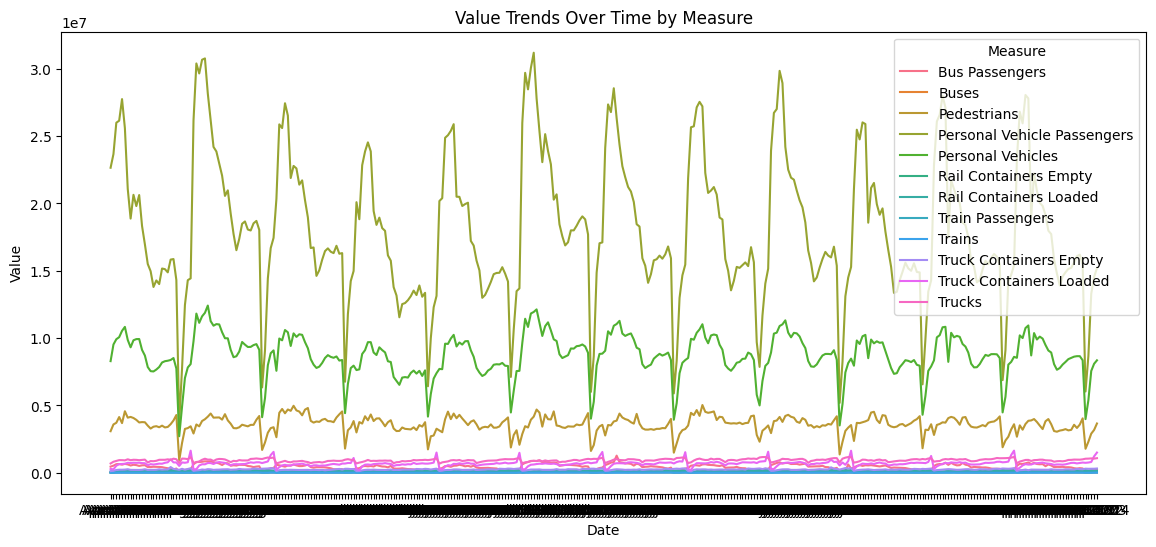

In [48]:
plt.figure(figsize=(14, 6))
df_grouped = df.groupby(['Date', 'Measure'])['Value'].sum().reset_index()
sns.lineplot(data=df_grouped, x='Date', y='Value', hue='Measure')
plt.title('Value Trends Over Time by Measure')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend(title='Measure')
plt.show()

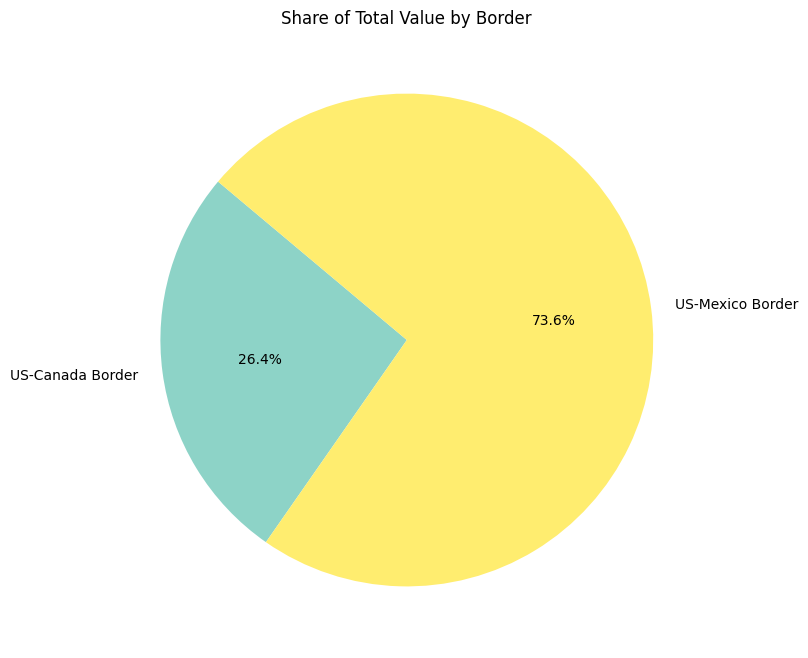

In [49]:
border_data = df.groupby('Border')['Value'].sum()

plt.figure(figsize=(8, 8))
border_data.plot.pie(autopct='%1.1f%%', startangle=140, cmap='Set3')
plt.title('Share of Total Value by Border')
plt.ylabel('')  # Hide y-label for aesthetics
plt.show()


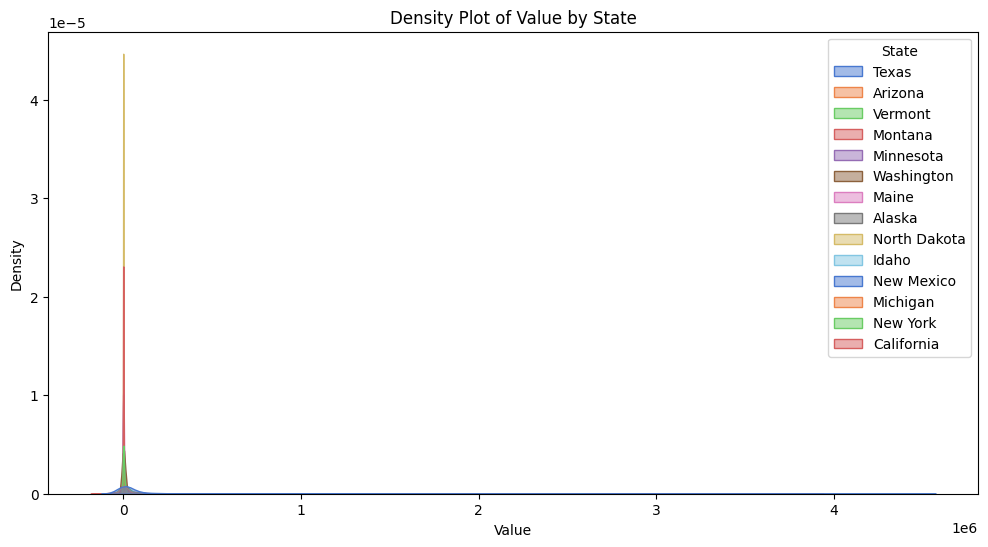

In [51]:
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df, x='Value', hue='State', fill=True, alpha=0.5, palette='muted')
plt.title('Density Plot of Value by State')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()

In [52]:
df.to_csv('cleaned_data', index=False)
print("Data Saved 'cleaned_data'")

Data Saved 'cleaned_data'
